# Modelo RFM

## Análisis de la base de datos Northwind

Northwind Traders es una muestra de base de datos que se incluye junto con la aplicación Microsoft Access. La base de datos Northwind está disponible bajo una licencia pública de Microsoft [[source](https://en.wikiversity.org/wiki/Database_Examples/Northwind)].

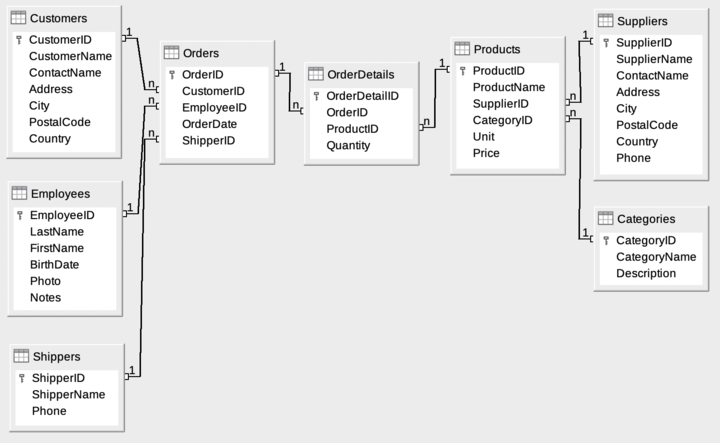

### Convertir las tablas en dataframes de pandas

In [1]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Importar librerías
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

import sqlite3
import pandas as pd

In [2]:
# Conectar a la base de datos
conn = sqlite3.connect('northwind.db')

# Lista de tablas a convertir en DataFrames
tables = [
    'Categories', 'Customers', 'Employees', 'OrderDetails',
    'Orders', 'Products', 'Shippers', 'Suppliers'
]

# Diccionario para almacenar los DataFrames
dataframes = {}

# Crear un DataFrame para cada tabla y almacenarlo en el diccionario
for table in tables:
    query = f"SELECT * FROM {table}"
    dataframes[table] = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

In [3]:
# Mostrar los primeros registros de cada DataFrame
for table, df in dataframes.items():
    title = f"DataFrame for {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    display(df.head())


DataFrame for Categories:


,CategoryID,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"



DataFrame for Customers:


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la ConstituciÃ³n 2222,MÃ©xico D.F.,5021,Mexico
2,3,Antonio Moreno TaquerÃ­a,Antonio Moreno,Mataderos 2312,MÃ©xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbkÃ¶p,Christina Berglund,BerguvsvÃ¤gen 8,LuleÃ¥,S-958 22,Sweden



DataFrame for Employees:


,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Davolio,Nancy,1968-12-08,EmpID1.pic,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,1952-02-19,EmpID2.pic,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,1963-08-30,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,1958-09-19,EmpID4.pic,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,1955-03-04,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...



DataFrame for OrderDetails:


,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40



DataFrame for Orders:


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2



DataFrame for Products:


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35



DataFrame for Shippers:


,ShipperID,ShipperName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931



DataFrame for Suppliers:


,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
0,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
1,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
2,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735
3,4,Tokyo Traders,Yoshi Nagase,9-8 Sekimai Musashino-shi,Tokyo,100,Japan,(03) 3555-5011
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54


In [4]:
# Shape de cada DataFrame
for table, df in dataframes.items():
    title = f"Shape de {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    print(df.shape)


Shape de Categories:
(8, 3)

Shape de Customers:
(91, 7)

Shape de Employees:
(10, 6)

Shape de OrderDetails:
(518, 4)

Shape de Orders:
(196, 5)

Shape de Products:
(77, 6)

Shape de Shippers:
(3, 3)

Shape de Suppliers:
(29, 8)


In [5]:
# Tipos de datos de cada DataFrame
for table, df in dataframes.items():
    title = f"Tipos de datos de {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    print(df.info())


Tipos de datos de Categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
 2   Description   8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes
None

Tipos de datos de Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    91 non-null     int64 
 1   CustomerName  91 non-null     object
 2   ContactName   91 non-null     object
 3   Address       91 non-null     object
 4   City          91 non-null     object
 5   PostalCode    91 non-null     object
 6   Country       91 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB
None

Tipos de datos de Employees:
<cla